In [1]:
import pandas as pd
from prophet import Prophet

c:\Users\Edgar\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataframe = pd.read_csv('../data/processed/pc_sums.csv', index_col=0)
dataframe.index = pd.to_datetime(dataframe.index)

products = dataframe.columns[1:-1]

In [3]:
product_df = dataframe[products[0]]
product_df.index = pd.to_datetime(product_df.index)

In [4]:
# prophet columns: ds, y --> index, value
product_df = product_df.reset_index()
product_df.columns = ['ds', 'y']

In [5]:
product_df

,ds,y
0,2020-01-03,761.685
1,2020-01-04,0.000
2,2020-01-05,0.000
3,2020-01-06,0.000
4,2020-01-07,764.643
...,...,...
1353,2023-09-17,0.000
1354,2023-09-18,521.000
1355,2023-09-19,474.000
1356,2023-09-20,491.000


In [6]:
# initiate prophet app
m = Prophet()
m.fit(product_df)

09:53:42 - cmdstanpy - INFO - Chain [1] start processing
09:53:43 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future = m.make_future_dataframe(periods=3)

In [8]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1356,2023-09-20,343.818607,-351.983826,1044.429739
1357,2023-09-21,329.883350,-353.483412,1007.670588
1358,2023-09-22,581.718020,-68.313575,1299.418244
1359,2023-09-23,-104.575163,-786.646858,539.291388
1360,2023-09-24,-265.327124,-1004.407724,500.452118


In [14]:
forecast['sums'] = forecast['yhat'].tail(20).rolling(5).sum()

In [21]:
forecast.tail(20)['yhat']

1341    456.464050
1342    439.378300
1343    416.963780
1344    656.900459
1345    -44.525041
1346   -223.367665
1347    384.057934
1348    401.096659
1349    379.540947
1350    354.478806
1351    593.736202
1352   -106.306408
1353   -281.665662
1354    331.324727
1355    355.932982
1356    343.818607
1357    329.883350
1358    581.718020
1359   -104.575163
1360   -265.327124
Name: yhat, dtype: float64

In [29]:
forecast['sums'].fillna(0).astype(int)

0          0
1          0
2          0
3          0
4          0
        ... 
1356     643
1357    1079
1358    1942
1359    1506
1360     885
Name: sums, Length: 1361, dtype: int32

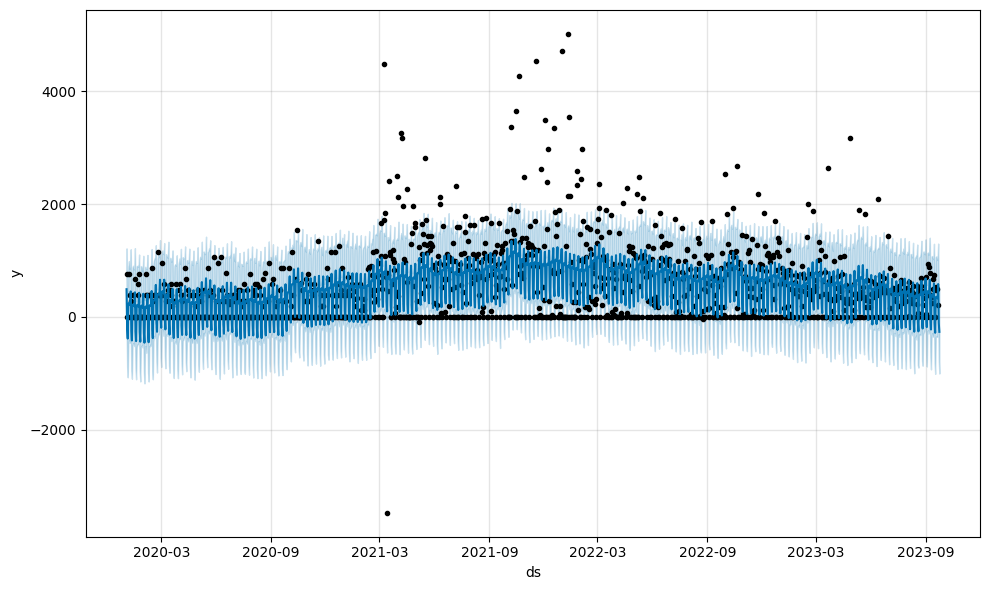

In [9]:
fig1 = m.plot(forecast)

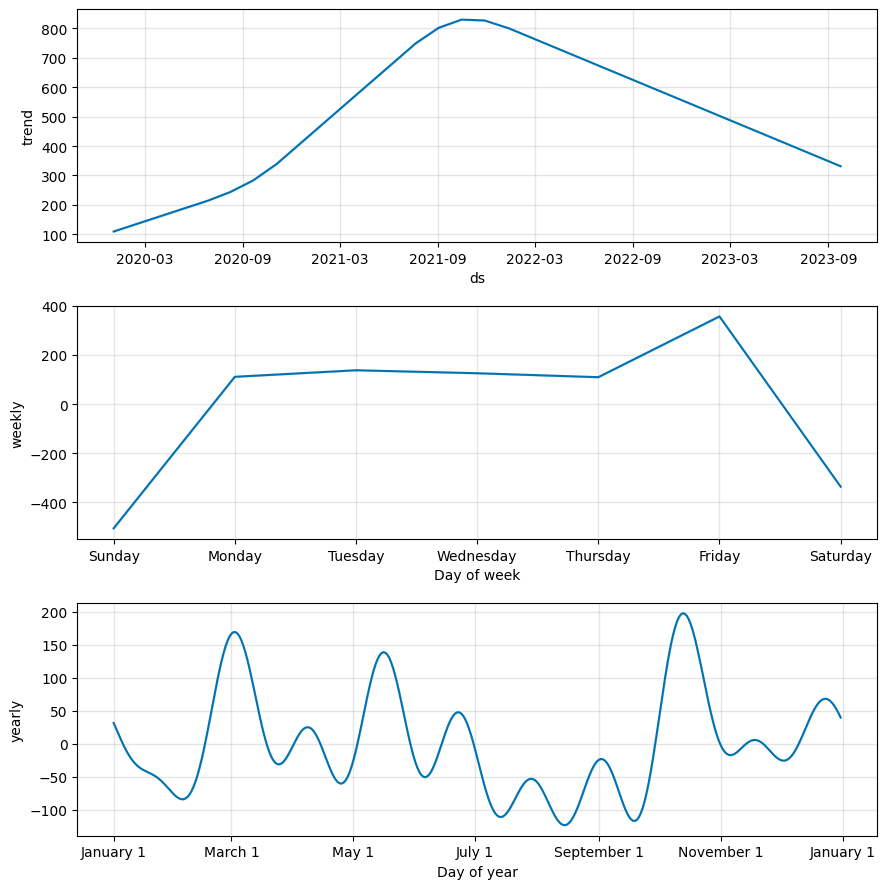

In [10]:
fig2 = m.plot_components(forecast)

In [11]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)